In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("heart.csv")
print("Shape:", df.shape)
print(df.head())

print("\nDataset info:")
print(df.info())
print("\nMissing values per column:")
print(df.isna().sum())

Shape: (918, 12)
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          ----

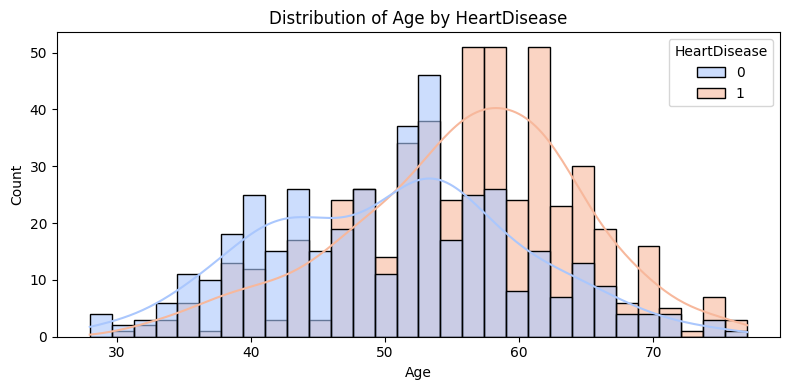

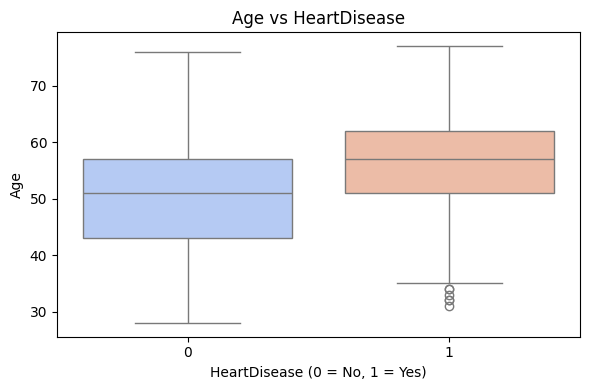

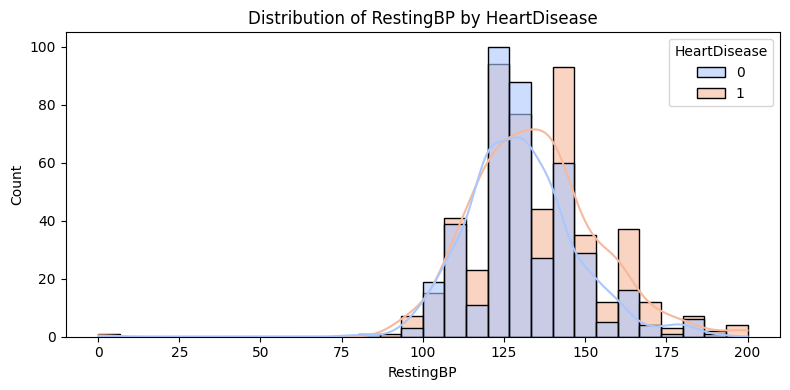

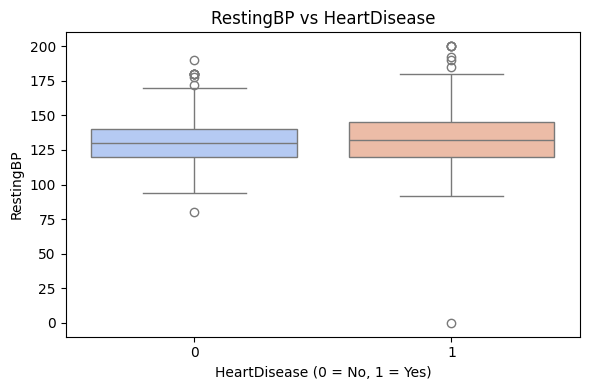

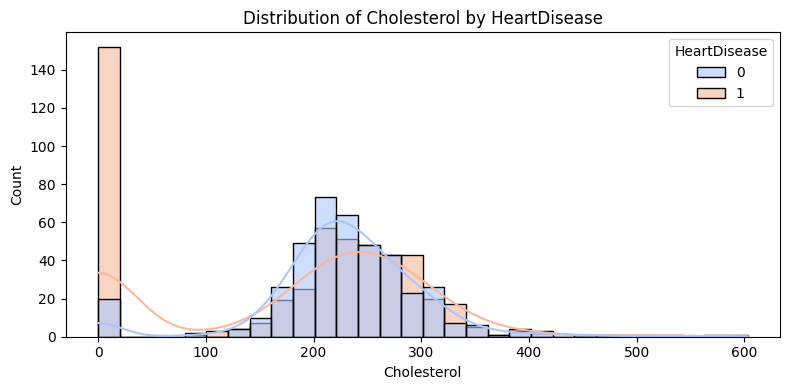

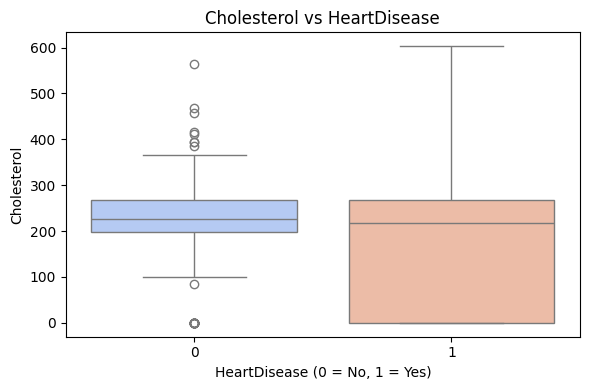

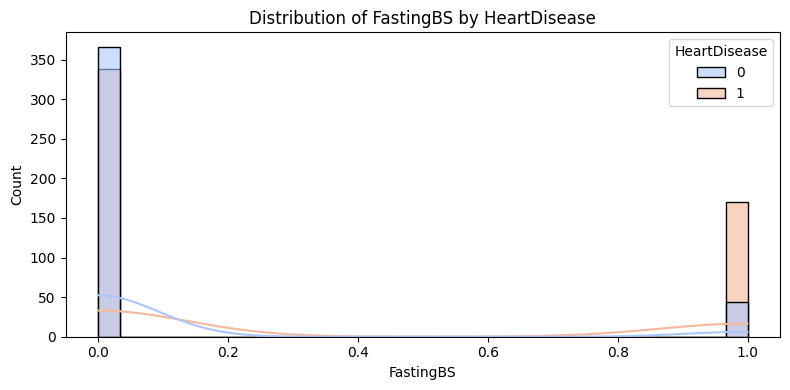

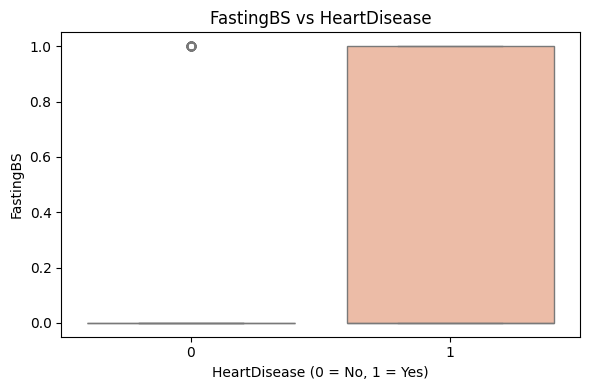

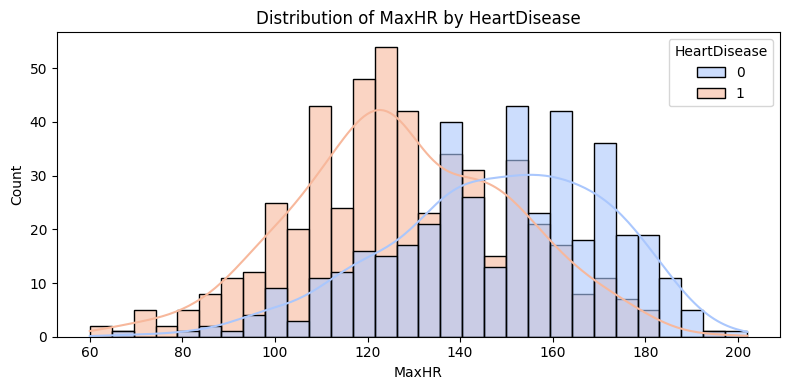

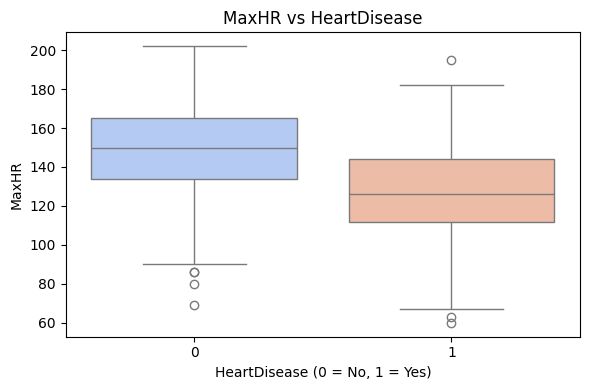

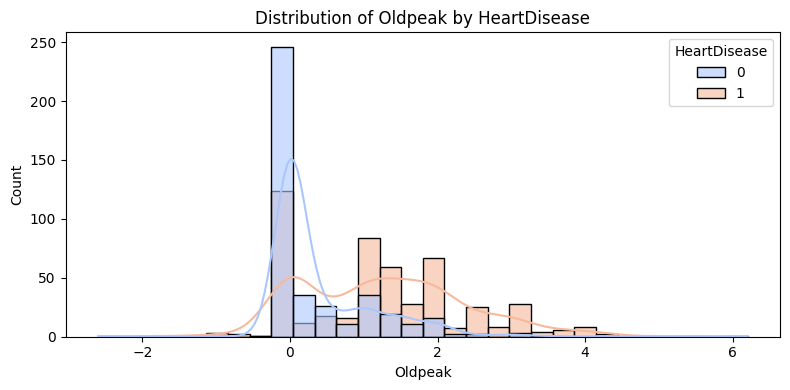

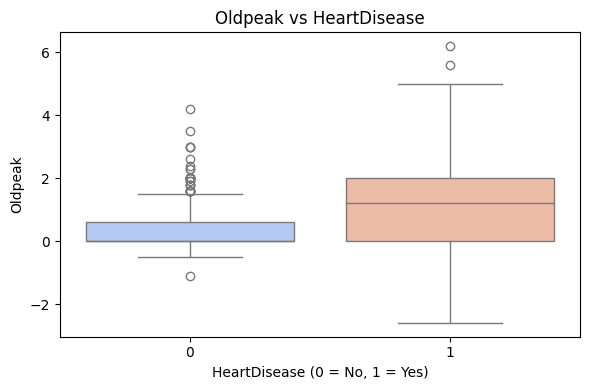

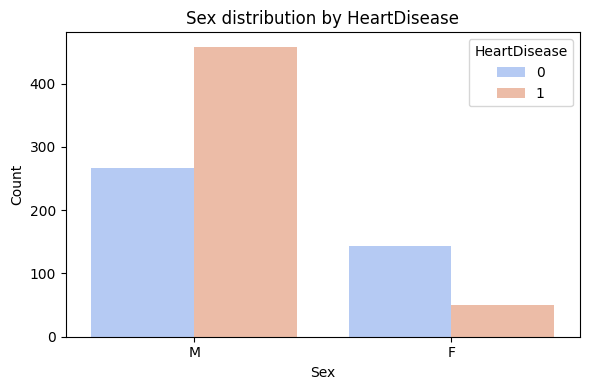

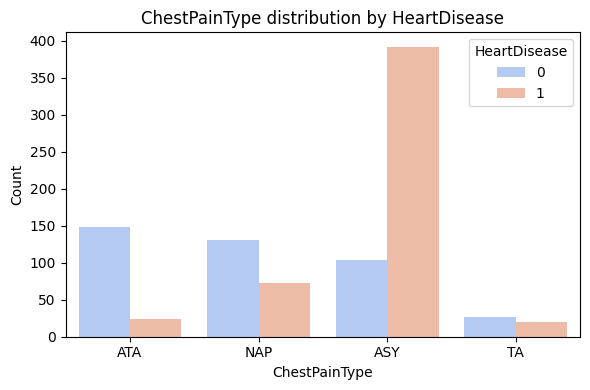

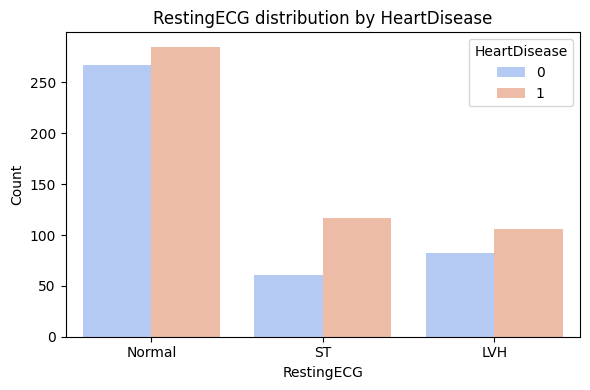

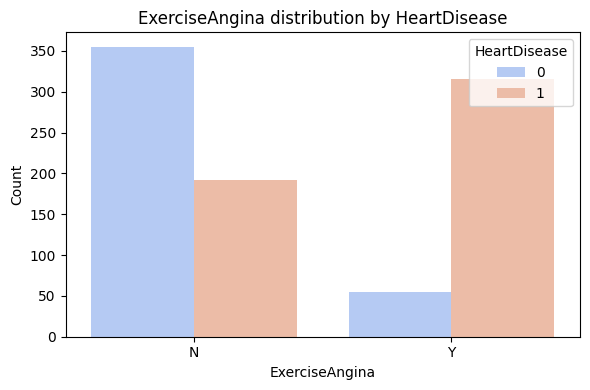

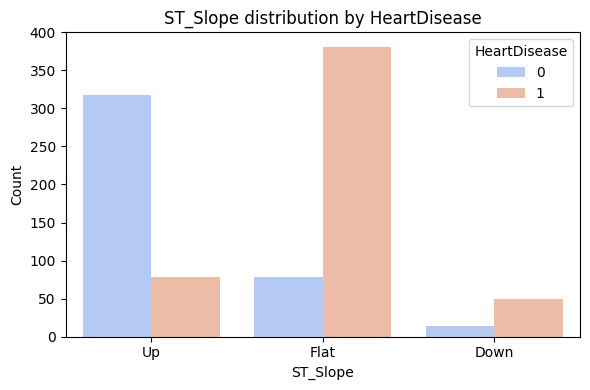

In [4]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.makedirs("plots", exist_ok=True)

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in numeric_cols:
    if col == "HeartDisease":
        continue

    plt.figure(figsize=(8, 4))
    sns.histplot(
        data=df, x=col, hue="HeartDisease", kde=True,
        bins=30, palette="coolwarm", alpha=0.6
    )
    plt.title(f"Distribution of {col} by HeartDisease")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(f"plots/{col}_distribution.png", dpi=150)
    plt.show()

    # Boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        data=df, x="HeartDisease", y=col,
        hue="HeartDisease", palette="coolwarm", legend=False
    )
    plt.title(f"{col} vs HeartDisease")
    plt.xlabel("HeartDisease (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.savefig(f"plots/{col}_boxplot.png", dpi=150)
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue="HeartDisease", palette="coolwarm")
    plt.title(f"{col} distribution by HeartDisease")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="HeartDisease", loc="upper right")
    plt.tight_layout()
    plt.savefig(f"plots/{col}_countplot.png", dpi=150)
    plt.show()



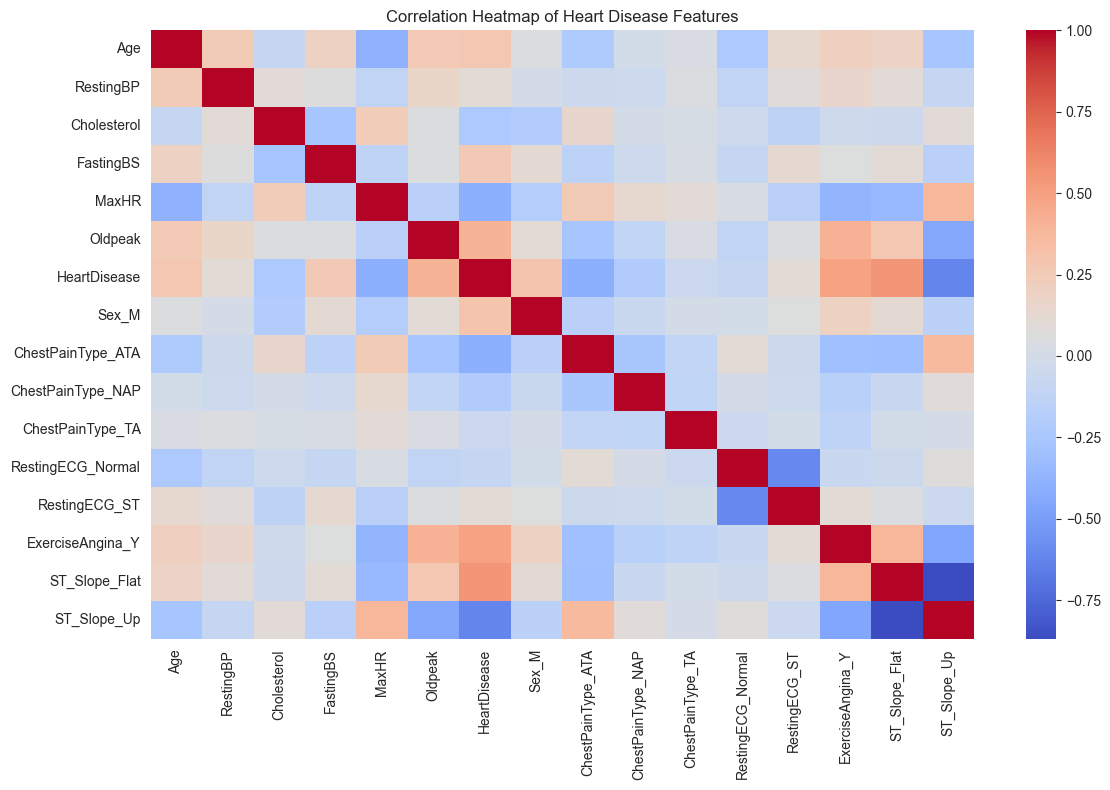

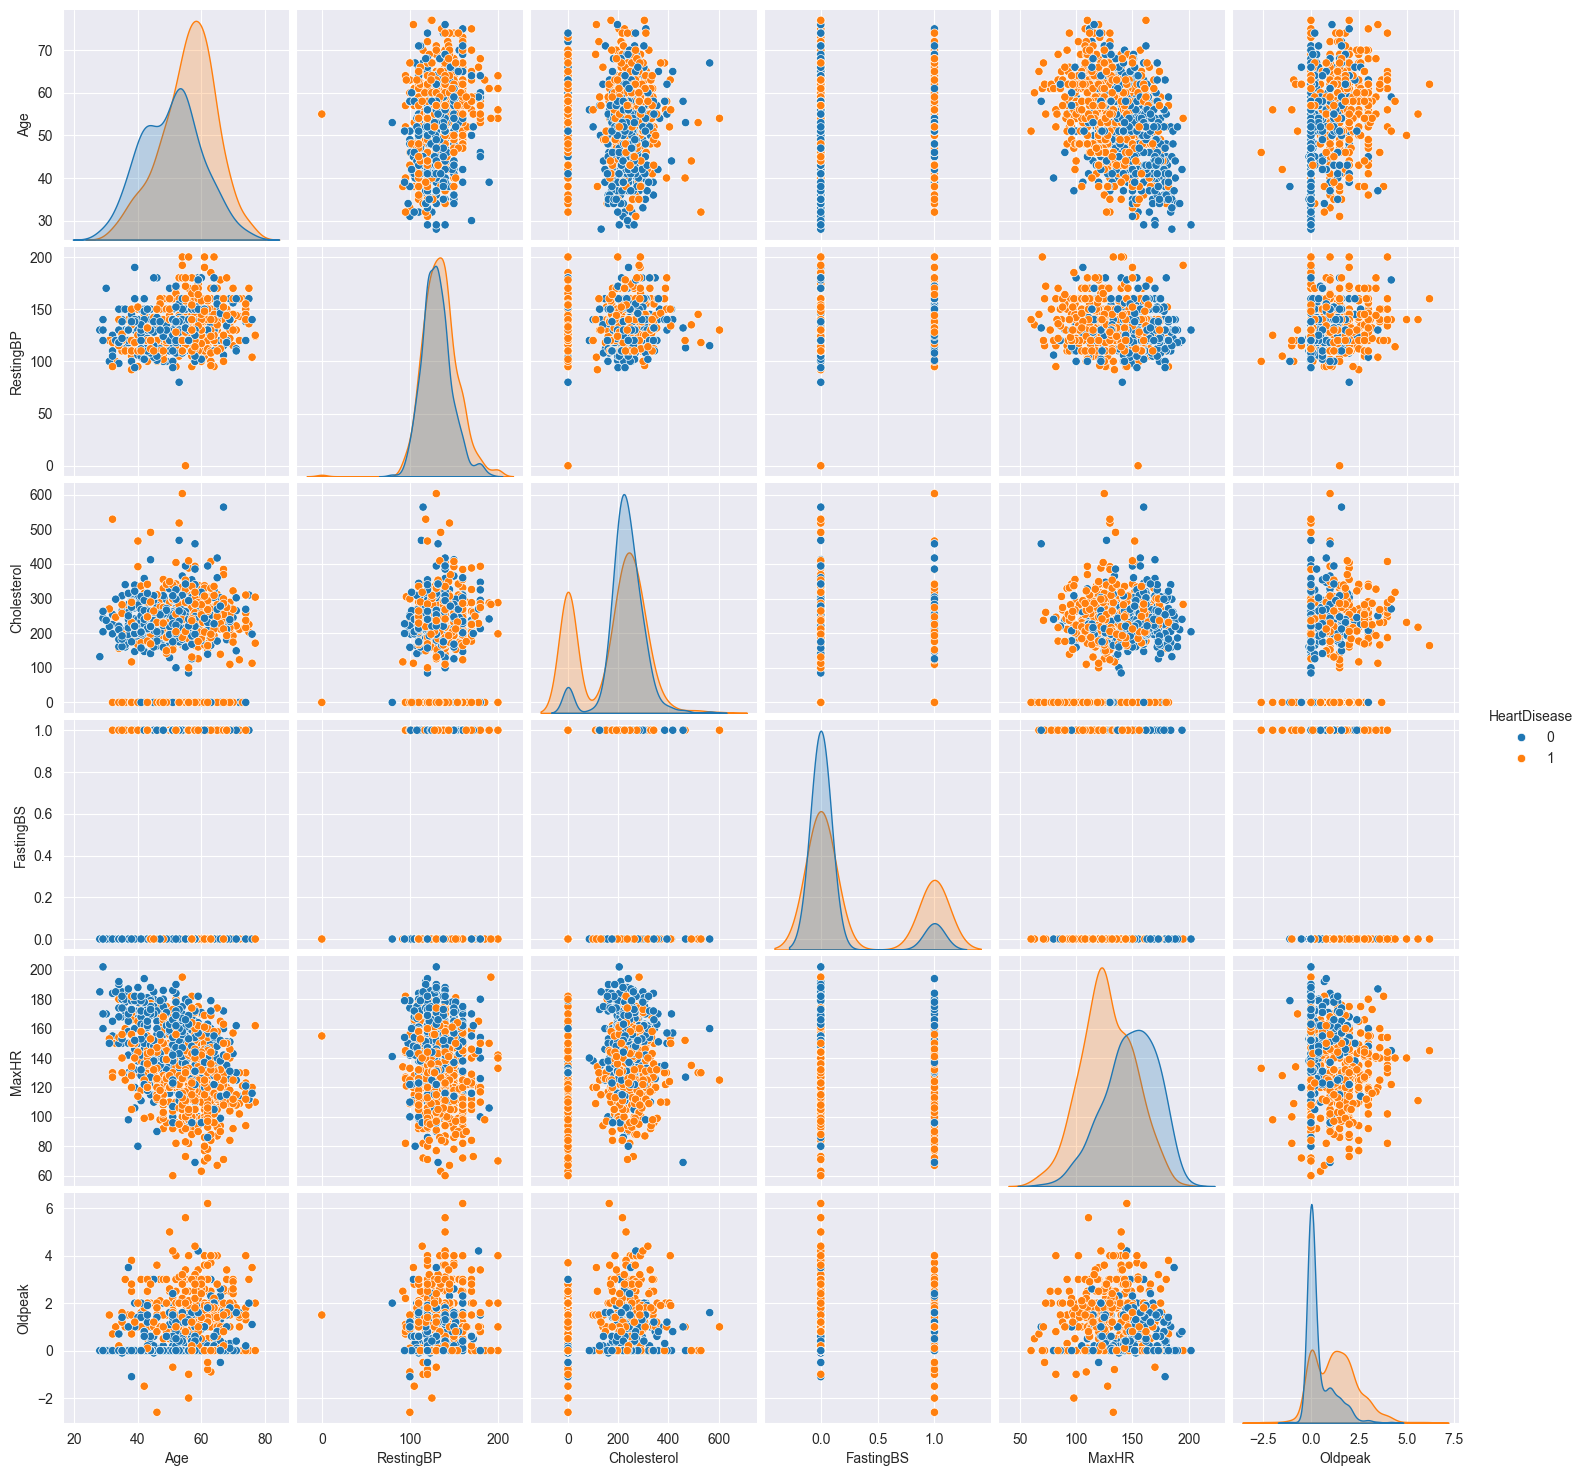

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("heart.csv")

# Convert categorical to numeric for correlation
df_encoded = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Heart Disease Features")
plt.tight_layout()
plt.savefig(f"plots/heatmap.png", dpi=150)
plt.show()
sns.pairplot(df, hue="HeartDisease")
plt.savefig(f"plots/pairplot.png", dpi=150)
plt.show()


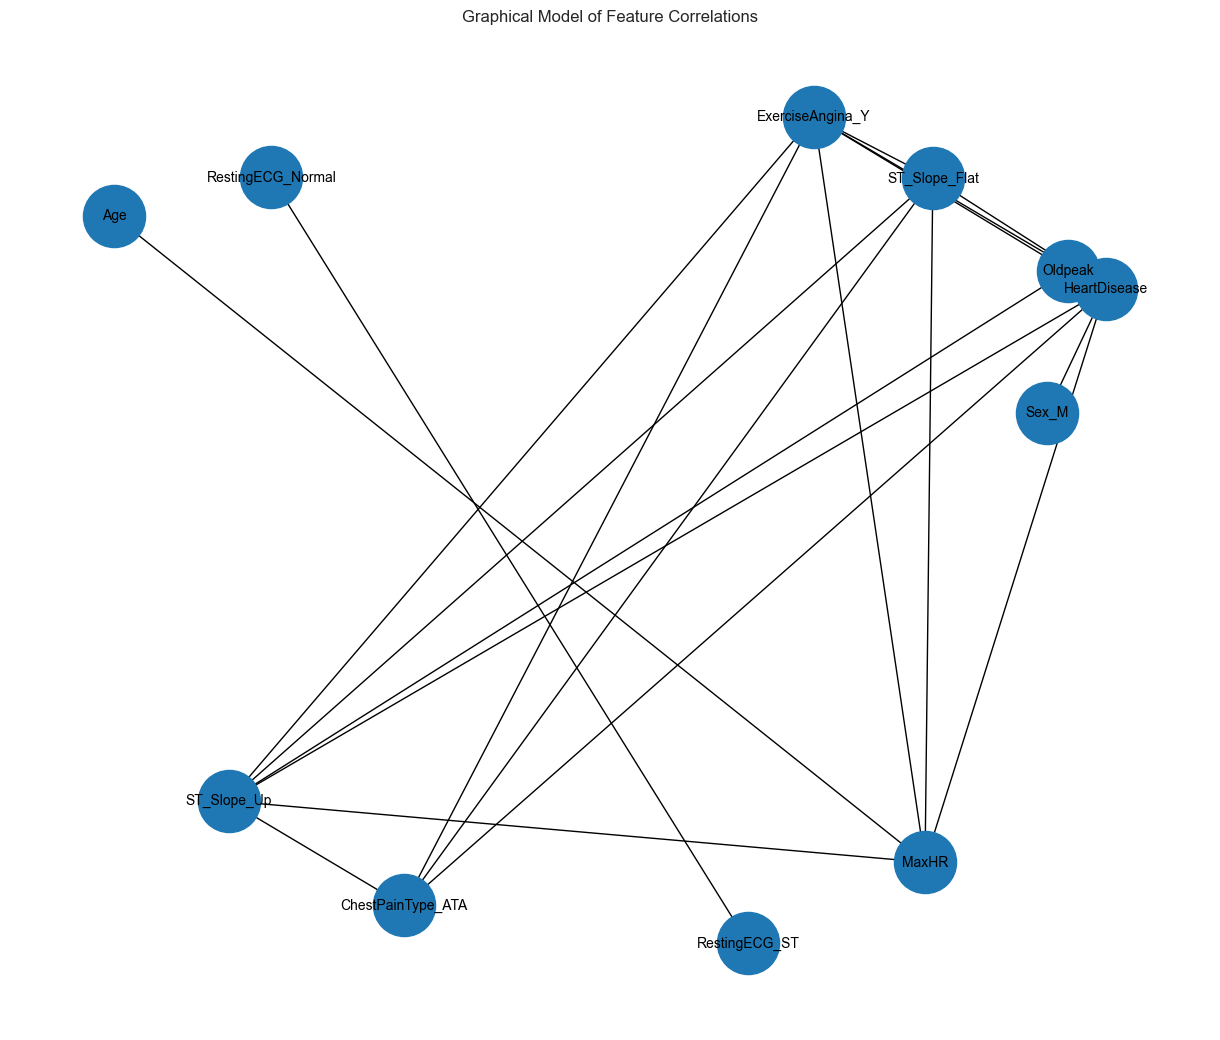

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv("heart.csv")
df_encoded = pd.get_dummies(df, drop_first=True)

corr = df_encoded.corr()

G = nx.Graph()

# Add edges only for correlations above a threshold
threshold = 0.3
for i in corr.columns:
    for j in corr.columns:
        if i != j and abs(corr.loc[i, j]) > threshold:
            G.add_edge(i, j, weight=corr.loc[i, j])

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10)
plt.title("Graphical Model of Feature Correlations")
plt.savefig(f"plots/network.png", dpi=150)
plt.show()
